### CCD data analysis

Aufgabe 3)

In [43]:
# calculate rough gain estimates from relations with poisson statistic (eq 2.1 and 2.2)
N_adu, sigma_adu = 4.469995e3, 4.724514e1
blue_gain = N_adu / sigma_adu**2

N_adu, sigma_adu = 3.245909e3 , 4.023987e1
green_gain = N_adu / sigma_adu**2

print("blue [ADU]:", round(blue_gain, 3), "green [ADU]:", round(green_gain, 3))

blue [ADU]: 2.003 green [ADU]: 2.005


Aufgabe 4)

Text(0.5, 1.0, '(B)')

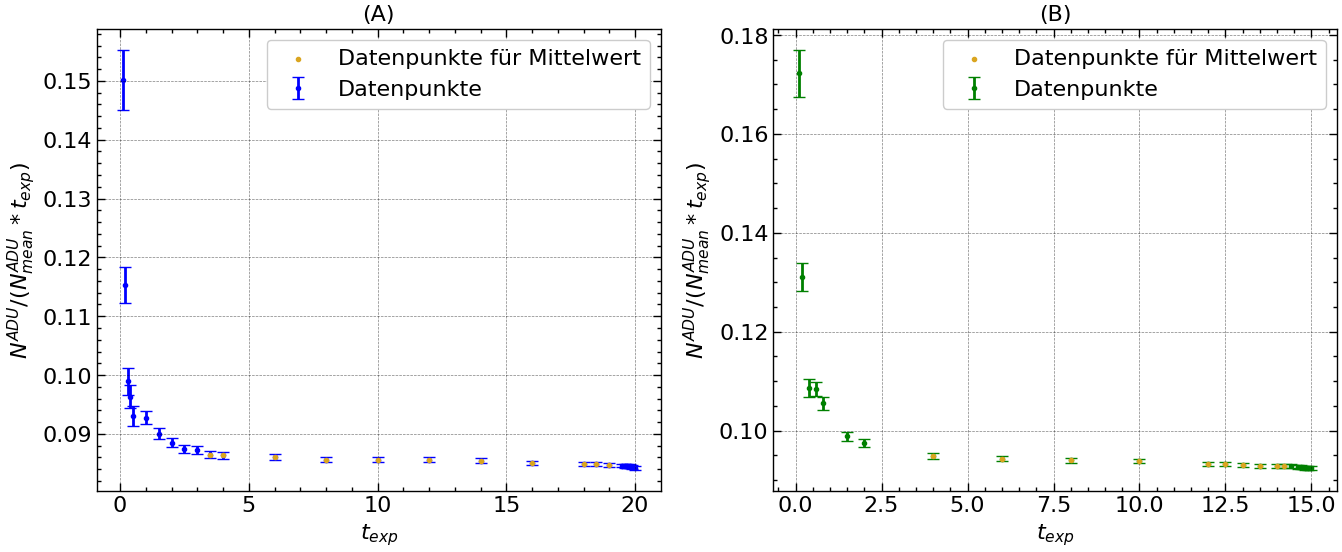

In [44]:
# plot N_adu against exposure time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid', 'high-contrast'])
from uncertainties import ufloat, unumpy

def N_adu_vs_exposure_plot(color, thresholds):

    df = pd.read_csv(color+"_time.csv", header=0)

    # make uncertainty array
    N_full = unumpy.uarray(df["mean_"+color], df["std_"+color])

    # subset for calculating mean
    subset = df[(df["time"] > thresholds[0]) & (df["time"] < thresholds[1])]
    N_subset = unumpy.uarray(subset["mean_"+color], subset["std_"+color])
    N_mean = np.mean(N_subset)

    # Calculate y_values with uncertainties

    y_values = N_full / df["time"] / N_mean

    # Plot the data with error bars
    plt.errorbar(df["time"], unumpy.nominal_values(y_values), yerr=unumpy.std_devs(y_values),
                    ls="", elinewidth=2, capsize=4, color=color, marker=".", zorder=0, label="Datenpunkte")
    plt.scatter(subset["time"], unumpy.nominal_values(N_subset / subset["time"] / N_mean), c="goldenrod", marker=".", label="Datenpunkte für Mittelwert")
    # Add labels and a title
    plt.xlabel(r"$t_{exp}$")
    plt.ylabel(r"$N^{ADU} / (N^{ADU}_{mean} * t_{exp})$")
    plt.legend()

    

plt.figure(figsize=(16,6))
plt.subplot(121)
N_adu_vs_exposure_plot("blue", [3, 19.5])
plt.title("(A)")
plt.subplot(122)
N_adu_vs_exposure_plot("green", [2, 14.4])
plt.title("(B)")

Aufgabe 5)

blue free: a (5.15+/-0.35)e-06 b 0.519+/-0.020 c (-1.8+/-1.7)e+02
full well capacity: (1.09+/-0.04)e+05
blue with sigma: a (5.39+/-0.28)e-06 b 0.503+/-0.013
full well capacity: (1.121+/-0.030)e+05
green free: a (6.3+/-0.6)e-06 b 0.564+/-0.032 c (-3.3+/-2.8)e+02
full well capacity: (1.02+/-0.06)e+05
green with sigma: a (6.6+/-0.5)e-06 b 0.538+/-0.023
full well capacity: (1.06+/-0.05)e+05


Text(0.5, 1.0, '(B)')

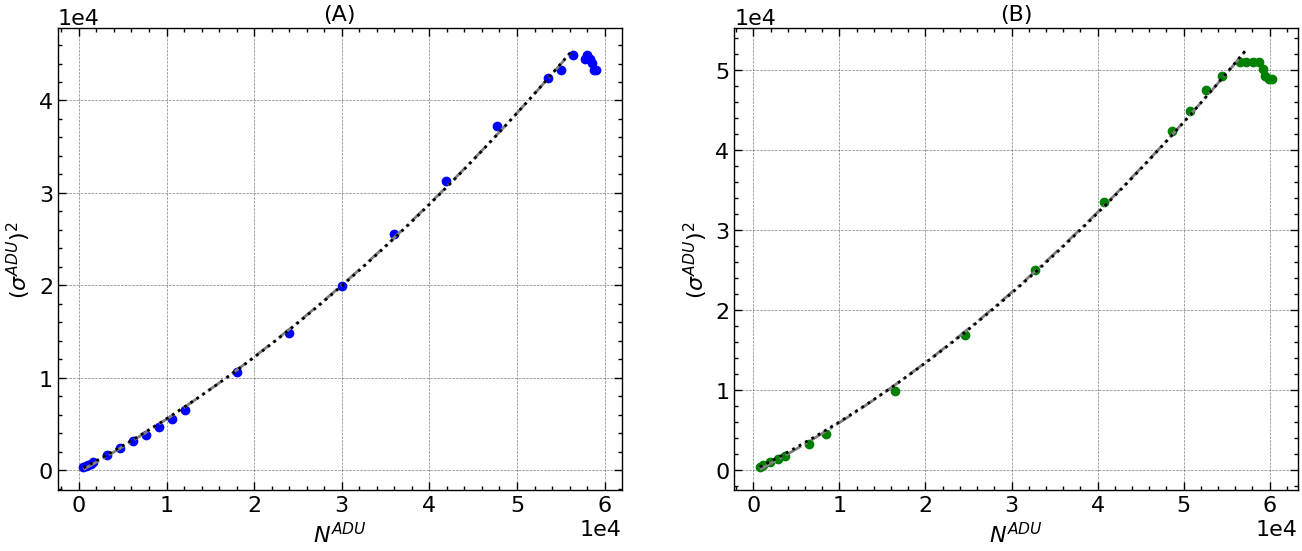

In [56]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
from uncertainties import ufloat
plt.style.use(['science', 'notebook', 'grid', 'high-contrast'])

def N_sigma_fits(color):
    # plot N_adu against sigma_adu^2
    df = pd.read_csv(color+"_time.csv", header=0)

    plt.scatter(df["mean_"+color], df["std_"+color]**2, c=color)

    # prepare data for fit
    x_data, y_data = df["mean_"+color][0:-6], df["std_"+color][0:-6]**2
    x_range = np.linspace(np.min(x_data), np.max(x_data), 200)

    # fit with general quadratic polynomial
    def quadratic_poly(x, a, b, c):
        return (a*x**2 + b*x + c)

    popt, pcov = sp.optimize.curve_fit(quadratic_poly, x_data, y_data)
    plt.plot(x_range, quadratic_poly(x_range, popt[0], popt[1], popt[2]), ls="-.", c="grey", label="freier quadratischer Fit")
    print(color, "free:", "a", ufloat(popt[0], np.sqrt(pcov[0,0])), "b", ufloat(popt[1], np.sqrt(pcov[1,1])), "c", ufloat(popt[2], np.sqrt(pcov[2,2])))
    print("full well capacity:", np.max(x_data) / ufloat(popt[1], np.sqrt(pcov[1,1])))

    # fit with constant from sigma_ron (Aufgabe 2)
    sigma_ron = 1.773035e0
    def quadratic_poly_sig(x, a, b):
        return (a*x**2 + b*x + sigma_ron)

    popt, pcov = sp.optimize.curve_fit(quadratic_poly_sig, x_data, y_data)
    plt.plot(x_range, quadratic_poly_sig(x_range, popt[0], popt[1]), ls=":", c="black", label=r"Fit mit $\sigma^{ADU}_{ron}$")
    print(color, "with sigma:", "a", ufloat(popt[0], np.sqrt(pcov[0,0])), "b", ufloat(popt[1], np.sqrt(pcov[1,1])))
    print("full well capacity:", np.max(x_data) / ufloat(popt[1], np.sqrt(pcov[1,1])))

    plt.xlabel(r"$N^{ADU}$")
    plt.ylabel(r"$(\sigma^{ADU})^2$")
    plt.ticklabel_format(axis="both", style="sci", scilimits=(4,4))



plt.figure(figsize=(16,6))
plt.subplot(121)
N_sigma_fits("blue")
plt.title("(A)")
plt.subplot(122)
N_sigma_fits("green")
plt.title("(B)")

Aufgabe 6)

Aufgabe 8)